# AM 115: Mathematical Modeling
### Final Project: Shirley Wang

#### Aim 2: Formalize group-level theory 

<img src="images/mod2.png" style="width: 600px;">

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def mod2(t, y_vec, a1, b1, b2, c1, c2, c3):
    '''
    vars:
        H: healty population without mental disorder or suicidal thoughts 
        M: population with mental disorder and NO suicidal thoughts
        S: population with suicidal thoughts 
        D: died by suicide
    
    args:
        a1: rate of healthy --> mental disorder
        b1: rate of mental disorder --> suicidal
        b2: rate of mental disorder --> healthy ('recovery rate')
        c1: rate of suicidal --> died by suicide ('lethal attempt rate')
        c2: rate of suicidal --> mental disorder ('recovery from STBs rate')
    '''
    H = y_vec[0]
    M = y_vec[1]
    S = y_vec[2]
    D = y_vec[3]
    
    N = H + M + S + D # total population
    
    dH = -(a1/N)*H*M + b2*M + c3*S
    dM = (a1/N)*H*M - (b1/N)*M*S - b2*M + c2*S
    dS = (b1/N)*M*S - c1*S - c2*S - c3*S
    dD = c1*S
    
    return(dH, dM, dS, dD)

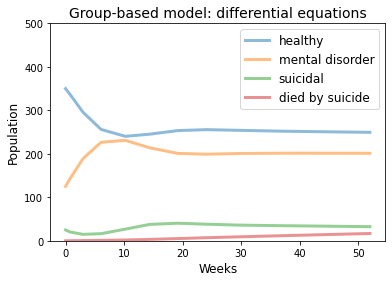

In [596]:
### initial conditions 
n = 500
y_vec = np.array([int(n*0.7), int(n*0.25), int(n*.05), 0])

# parameters
a1 = 0.7
b1 = 2.0
b2 = 0.3
c1 = 0.01
c2 = 0.5
c3 = 0.3

# integrate 
sol_1 = solve_ivp(mod2, [0, 52], y_vec, args = (a1, b1, b2, c1, c2, c3))

# plot
plt.figure(figsize=(6, 4))
plt.plot(sol_1.t, sol_1.y[0, :], label = 'healthy', linewidth = 3, alpha = 0.5)
plt.plot(sol_1.t, sol_1.y[1, :], label = 'mental disorder', linewidth = 3, alpha = 0.5)
plt.plot(sol_1.t, sol_1.y[2, :], label = 'suicidal', linewidth = 3, alpha = 0.5)
plt.plot(sol_1.t, sol_1.y[3, :], label = 'died by suicide', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Group-based model: differential equations', fontsize = 14)
plt.ylabel('Population', fontsize = 12)
plt.xlabel('Weeks', fontsize = 12)
plt.ylim([0, n])
plt.savefig("images/group_diffeq.png", dpi = 300);

## Individual Agent Model

In [306]:
def simulate1D(n, nc, pHM, pMS, pSD, pMH, pSM, pSH):
    
    t = 0
    pop = initial1D(int(n*0.7), int(n*0.25), int(n*.05), 0)
    H, M, S, D = census1D(pop)
    results = [[H, M, S, D]]
    tt = [t]
    
    for j in range(52):
        pop = suicidespread(nc, pHM, pMS, pSD, pMH, pSM, pSH, pop)
        H, M, S, D = census1D(pop)
        results.append([H, M, S, D])
        t = t+1
        tt.append(t)
    
    return tt, results

In [307]:
def initial1D(H0, M0, S0, D0):
    
    # sets initial population vector
    # each subpopulation is appended to ghe growing vector
    
    pop = []
    for i in range(H0):
        pop.append('H')
    for i in range(M0):
        pop.append('M')
    for i in range(S0):
        pop.append('S')
    for i in range(D0):
        pop.append('D')
    
    return pop

In [308]:
def census1D(pop):
    
    # counts the number of H, M, S, D cells in population
    
    H = 0
    M = 0
    S = 0
    D = 0
    N = np.array(pop).shape[0]
    
    for j in range(N):
        if pop[j] == 'H':
            H += 1
        if pop[j] == 'M':
            M += 1
        if pop[j] == 'S':
            S += 1
        if pop[j] == 'D':
            D += 1
    
    return H, M, S, D

In [431]:
def suicidespread(nc, pHM, pMS, pSD, pMH, pSM, pSH, pop1):
    
    # stochastic 'suicide epidemic' simulation calculates a new pop2 vector
    
    pop2 = pop1.copy()
    N = np.array(pop1).shape[0]
    
    for j in range(N):
        if pop1[j] == 'M':
            if np.random.rand() < pMH:
                pop2[j] = 'H'
            else:
                for c in range(nc):
                    k = j
                    while k == j:
                        k = np.random.randint(n)
                    if pop1[k] == 'H' and np.random.rand() < pHM:
                        pop2[k] = 'M'
                    elif pop1[k] == 'S' and np.random.rand() < pMS:
                        pop2[j] = 'S'
            
        elif pop1[j] == 'S':
            r = np.random.rand()
            if r < pSM:
                pop2[j] = 'M'
            elif (r > pSM) & (r < pSM + pSD):
                pop2[j] = 'D'
            elif (r > pSM + pSD) & (r < pSM + pSD + pSH):
                pop2[j] = 'H'
    return pop2

<Figure size 432x288 with 0 Axes>

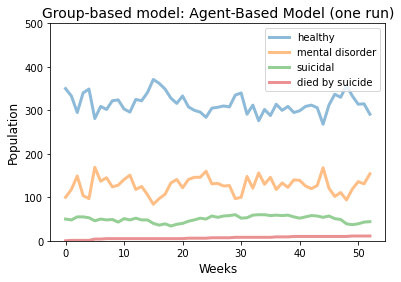

In [548]:
n = 500
nc = 20
pHM = 0.4
pMS = 0.3
pMH = 0.8
pSM = 0.2
pSD = 0.005
pSH = 0.05

tt, results = simulate1D(n, nc, pHM, pMS, pSD, pMH, pSM, pSH)
plt.figure()
plt.figure(figsize=(6, 4))
plt.plot(tt, results, linewidth = 3, alpha = 0.5)
plt.title('Group-based model: Agent-Based Model (one run)', size = 14)
plt.xlabel('Weeks', size = 12)
plt.ylabel('Population', size = 12)
plt.ylim([0, n])
plt.legend(['healthy', 'mental disorder', 'suicidal', 'died by suicide'])
plt.savefig("images/group_agent1.png", dpi = 300);

### Individual Agent: Multiple Runs

Note: code with much help from Laura in office hours! Thank you Laura! 

In [617]:
Nr = 20                    # number of simulations 
Nt = 53                    # number of max time steps 
X1 = np.zeros([Nr, 5, Nt])  # simulation 
X1[:] = np.nan  

# loop over the number of simulations 
for ii in range(Nr): 
    t1, results1 = simulate1D(n, nc, pHM, pMS, pSD, pMH, pSM, pSH)  # one run 
    
    X1[ii, 0, 0:len(t1)] = t1
    X1[ii, 1, 0:len(t1)] = [results1[ii][0] for ii in range(len(results1))] 
    X1[ii, 2, 0:len(t1)] = [results1[ii][1] for ii in range(len(results1))] 
    X1[ii, 3, 0:len(t1)] = [results1[ii][2] for ii in range(len(results1))] 
    X1[ii, 4, 0:len(t1)] = [results1[ii][3] for ii in range(len(results1))]

In [618]:
t1 = np.nanmean(X1[:, 0, :], axis = 0)
H1 = np.nanmean(X1[:, 1, :], axis = 0)
M1 = np.nanmean(X1[:, 2, :], axis = 0)
S1 = np.nanmean(X1[:, 3, :], axis = 0)
D1 = np.nanmean(X1[:, 4, :], axis = 0)
H1_v = np.sqrt(np.nanvar(X1[:, 1, :], axis = 0))
M1_v = np.sqrt(np.nanvar(X1[:, 2, :], axis = 0))
S1_v = np.sqrt(np.nanvar(X1[:, 3, :], axis = 0))
D1_v = np.sqrt(np.nanvar(X1[:, 4, :], axis = 0))

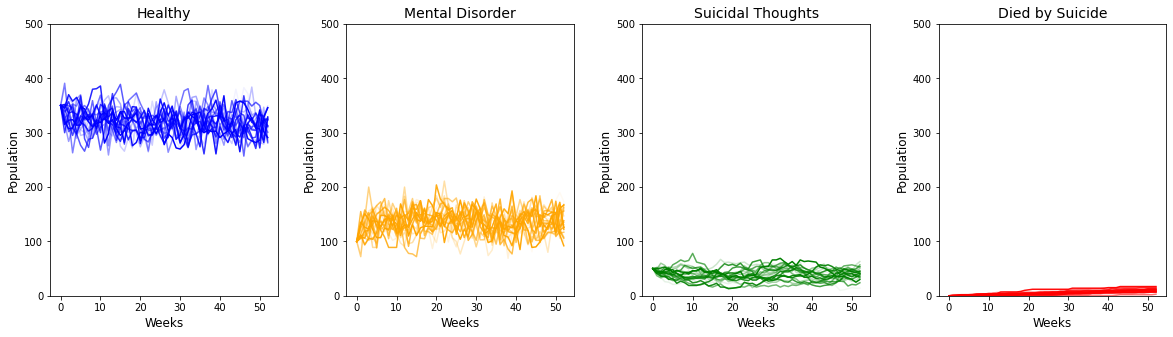

In [619]:
# plotting all the runs for simulation 1 

fig, ax = plt.subplots(1, 4, figsize = (20, 5))
N = 20

for ii in range(N): 
    ax[0].plot(X1[ii, 0, :], X1[ii, 1, :], 'blue', alpha = 1 - (1./N* ii))
    ax[0].set_title('Healthy', size = 14)
    ax[0].set_ylim([0, n])

    ax[1].plot(X1[ii, 0, :], X1[ii, 2, :], 'orange', alpha = 1 - (1./N* ii))
    ax[1].set_title('Mental Disorder', size = 14)
    ax[1].set_ylim([0, n])

    ax[2].plot(X1[ii, 0, :], X1[ii, 3, :], 'green', alpha = 1 - (1./N* ii))
    ax[2].set_title('Suicidal Thoughts', size = 14)
    ax[2].set_ylim([0, n])
    
    ax[3].plot(X1[ii, 0, :], X1[ii, 4, :], 'red', alpha = 1 - (1./N* ii))
    ax[3].set_title('Died by Suicide', size = 14)
    ax[3].set_ylim([0, n])
    
for ii in range(4): 
    ax[ii].set_xlabel('Weeks', size = 12)
    ax[ii].set_ylabel('Population', size = 12)

plt.subplots_adjust(wspace=0.3)

plt.savefig("images/group_agent_multi.png", dpi = 300);

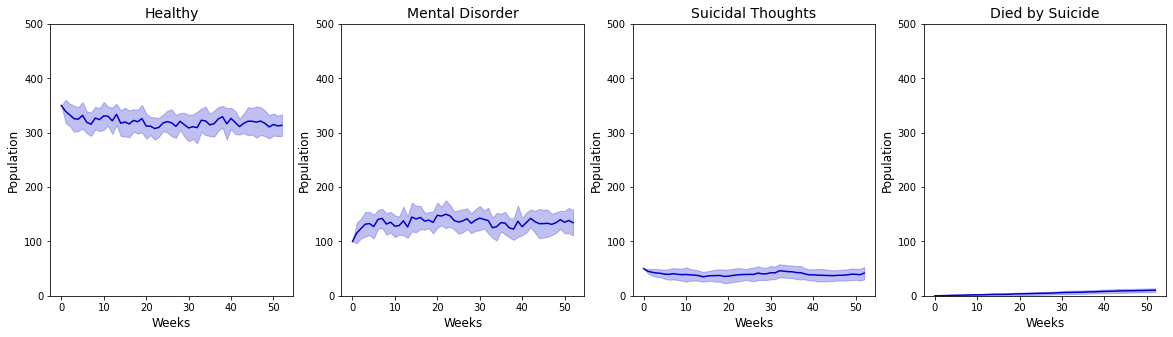

In [621]:
# with error bars
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
a_val = 0.25

ax[0].plot(t1, H1, color='mediumblue')
ax[0].fill_between(t1, (H1 + H1_v), (H1 -  H1_v), color='mediumblue', alpha=a_val)
ax[0].set_ylim([0, n])
ax[0].set_title('Healthy', size = 14)

ax[1].plot(t1, M1, color='mediumblue')
ax[1].fill_between(t1, (M1 + M1_v), (M1 - M1_v), color='mediumblue', alpha=a_val)
ax[1].set_ylim([0, n])
ax[1].set_title('Mental Disorder', size = 14)

ax[2].plot(t1, S1, color='mediumblue', label = 'nc = 20, pt = 0.1')
ax[2].fill_between(t1, (S1 + S1_v), (S1 - S1_v), color='mediumblue', alpha=a_val)
ax[2].set_ylim([0, n])
ax[2].set_title('Suicidal Thoughts', size = 14)

ax[3].plot(t1, D1, color='mediumblue', label = 'nc = 20, pt = 0.1')
ax[3].fill_between(t1, (D1 + D1_v), (D1 - D1_v), color='mediumblue', alpha=a_val)
ax[3].set_ylim([0, n])
ax[3].set_title('Died by Suicide', size = 14)

for ii in range(4): 
    ax[ii].set_xlabel('Weeks', size = 12)
    ax[ii].set_ylabel('Population', size = 12)
    
plt.savefig("images/group_agent_error.png", dpi = 300);

### Individual Agent Models: Sensitivity to number of contacts

In [611]:
n = 500
pHM = 0.4
pMS = 0.3
pMH = 0.8
pSM = 0.2
pSD = 0.005
pSH = 0.05
nc_20 = 20
nc_40 = 40
nc_60 = 60

Nr = 20                    # number of simulations 
Nt = 53                    # number of max time steps 
X20 = np.zeros([Nr, 5, Nt])  # simulation 
X20[:] = np.nan  
X40 = np.zeros([Nr, 5, Nt])  # simulation 
X40[:] = np.nan  
X60 = np.zeros([Nr, 5, Nt])  # simulation 
X60[:] = np.nan  

# loop over the number of simulations 
for ii in range(Nr): 
    t20, results20 = simulate1D(n, nc_20, pHM, pMS, pSD, pMH, pSM, pSH) 
    
    X20[ii, 0, 0:len(t20)] = t1
    X20[ii, 1, 0:len(t20)] = [results20[ii][0] for ii in range(len(results20))] 
    X20[ii, 2, 0:len(t20)] = [results20[ii][1] for ii in range(len(results20))] 
    X20[ii, 3, 0:len(t20)] = [results20[ii][2] for ii in range(len(results20))] 
    X20[ii, 4, 0:len(t20)] = [results20[ii][3] for ii in range(len(results20))]
    
    t40, results40 = simulate1D(n, nc_40, pHM, pMS, pSD, pMH, pSM, pSH)  
    
    X40[ii, 0, 0:len(t40)] = t40
    X40[ii, 1, 0:len(t40)] = [results40[ii][0] for ii in range(len(results40))] 
    X40[ii, 2, 0:len(t40)] = [results40[ii][1] for ii in range(len(results40))] 
    X40[ii, 3, 0:len(t40)] = [results40[ii][2] for ii in range(len(results40))] 
    X40[ii, 4, 0:len(t40)] = [results40[ii][3] for ii in range(len(results40))]
    
    t60, results60 = simulate1D(n, nc_60, pHM, pMS, pSD, pMH, pSM, pSH)  # one run 
    
    X60[ii, 0, 0:len(t60)] = t60
    X60[ii, 1, 0:len(t60)] = [results60[ii][0] for ii in range(len(results60))] 
    X60[ii, 2, 0:len(t60)] = [results60[ii][1] for ii in range(len(results60))] 
    X60[ii, 3, 0:len(t60)] = [results60[ii][2] for ii in range(len(results60))] 
    X60[ii, 4, 0:len(t60)] = [results60[ii][3] for ii in range(len(results60))]

In [612]:
## calculate means & SDs

t20 = np.nanmean(X20[:, 0, :], axis = 0)
H20 = np.nanmean(X20[:, 1, :], axis = 0)
M20 = np.nanmean(X20[:, 2, :], axis = 0)
S20 = np.nanmean(X20[:, 3, :], axis = 0)
D20 = np.nanmean(X20[:, 4, :], axis = 0)
H20_v = np.sqrt(np.nanvar(X20[:, 1, :], axis = 0))
M20_v = np.sqrt(np.nanvar(X20[:, 2, :], axis = 0))
S20_v = np.sqrt(np.nanvar(X20[:, 3, :], axis = 0))
D20_v = np.sqrt(np.nanvar(X20[:, 4, :], axis = 0))

t40 = np.nanmean(X40[:, 0, :], axis = 0)
H40 = np.nanmean(X40[:, 1, :], axis = 0)
M40 = np.nanmean(X40[:, 2, :], axis = 0)
S40 = np.nanmean(X40[:, 3, :], axis = 0)
D40 = np.nanmean(X40[:, 4, :], axis = 0)
H40_v = np.sqrt(np.nanvar(X40[:, 1, :], axis = 0))
M40_v = np.sqrt(np.nanvar(X40[:, 2, :], axis = 0))
S40_v = np.sqrt(np.nanvar(X40[:, 3, :], axis = 0))
D40_v = np.sqrt(np.nanvar(X40[:, 4, :], axis = 0))

t60 = np.nanmean(X60[:, 0, :], axis = 0)
H60 = np.nanmean(X60[:, 1, :], axis = 0)
M60 = np.nanmean(X60[:, 2, :], axis = 0)
S60 = np.nanmean(X60[:, 3, :], axis = 0)
D60 = np.nanmean(X60[:, 4, :], axis = 0)
H60_v = np.sqrt(np.nanvar(X60[:, 1, :], axis = 0))
M60_v = np.sqrt(np.nanvar(X60[:, 2, :], axis = 0))
S60_v = np.sqrt(np.nanvar(X60[:, 3, :], axis = 0))
D60_v = np.sqrt(np.nanvar(X60[:, 4, :], axis = 0))

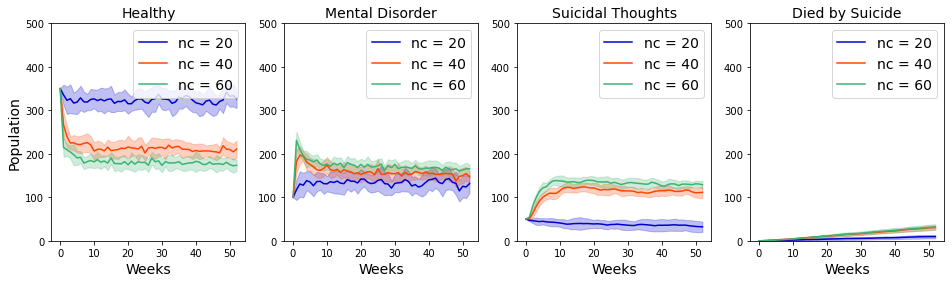

In [613]:
## plot! 

# with error bars
fig, ax = plt.subplots(1, 4, figsize = (16, 4))
a_val = 0.25

## nc = 20
ax[0].plot(t20, H20, color='mediumblue', label = 'nc = 20')
ax[0].fill_between(t20, (H20 + H20_v), (H20 -  H20_v), color='mediumblue', alpha=a_val)
ax[0].set_ylim([0, n])
ax[0].set_ylabel('Population', size = 14)
ax[0].set_title('Healthy', size = 14)

ax[1].plot(t20, M20, color='mediumblue', label = 'nc = 20')
ax[1].fill_between(t20, (M20 + M20_v), (M20 - M20_v), color='mediumblue', alpha=a_val)
ax[1].set_ylim([0, n])
ax[1].set_title('Mental Disorder', size = 14)

ax[2].plot(t20, S20, color='mediumblue', label = 'nc = 20')
ax[2].fill_between(t20, (S20 + S20_v), (S20 - S20_v), color='mediumblue', alpha=a_val)
ax[2].set_ylim([0, n])
ax[2].set_title('Suicidal Thoughts', size = 14)

ax[3].plot(t20, D20, color='mediumblue', label = 'nc = 20')
ax[3].fill_between(t20, (D20 + D20_v), (D20 - D20_v), color='mediumblue', alpha=a_val)
ax[3].set_ylim([0, n])
ax[3].set_title('Died by Suicide', size = 14)

## nc = 40
ax[0].plot(t40, H40, color='orangered', label = 'nc = 40')
ax[0].fill_between(t40, (H40 + H40_v), (H40 -  H40_v), color='orangered', alpha=a_val)

ax[1].plot(t40, M40, color='orangered', label = 'nc = 40')
ax[1].fill_between(t40, (M40 + M40_v), (M40 - M40_v), color='orangered', alpha=a_val)

ax[2].plot(t40, S40, color='orangered', label = 'nc = 40')
ax[2].fill_between(t40, (S40 + S40_v), (S40 - S40_v), color='orangered', alpha=a_val)

ax[3].plot(t40, D40, color='orangered', label = 'nc = 40')
ax[3].fill_between(t40, (D40 + D40_v), (D40 - D40_v), color='orangered', alpha=a_val)

## nc = 60
ax[0].plot(t60, H60, color='mediumseagreen', label = 'nc = 60')
ax[0].fill_between(t60, (H60 + H60_v), (H60 -  H60_v), color='mediumseagreen', alpha=a_val)

ax[1].plot(t60, M60, color='mediumseagreen', label = 'nc = 60')
ax[1].fill_between(t60, (M60 + M60_v), (M60 - M60_v), color='mediumseagreen', alpha=a_val)

ax[2].plot(t60, S60, color='mediumseagreen', label = 'nc = 60')
ax[2].fill_between(t60, (S60 + S60_v), (S60 - S60_v), color='mediumseagreen', alpha=a_val)

ax[3].plot(t60, D60, color='mediumseagreen', label = 'nc = 60')
ax[3].fill_between(t60, (D60 + D60_v), (D60 - D60_v), color='mediumseagreen', alpha=a_val)

for ii in range(4): 
    ax[ii].set_xlabel('Weeks', size = 14)
    #ax[ii].set_ylabel('Population', size = 12)
    ax[ii].legend(fontsize = 14, loc = 'upper right')
    
plt.savefig("images/group_agent_sensitivityNC.png", dpi = 300, bbox_inches='tight');

### Individual agent models: sensitivity to probability of transmission of suicidal thoughts

In [614]:
n = 500
nc = 20
pHM = 0.4
pMH = 0.8
pSM = 0.2
pSD = 0.005
pSH = 0.05

pMS_01 = 0.1
pMS_03 = 0.3
pMS_05 = 0.5

Nr = 20                    # number of simulations 
Nt = 53                    # number of max time steps 
X20 = np.zeros([Nr, 5, Nt])  # simulation 
X20[:] = np.nan  
X40 = np.zeros([Nr, 5, Nt])  # simulation 
X40[:] = np.nan  
X60 = np.zeros([Nr, 5, Nt])  # simulation 
X60[:] = np.nan  

# loop over the number of simulations 
for ii in range(Nr): 
    t20, results20 = simulate1D(n, nc, pHM, pMS_01, pSD, pMH, pSM, pSH) 
    
    X20[ii, 0, 0:len(t20)] = t1
    X20[ii, 1, 0:len(t20)] = [results20[ii][0] for ii in range(len(results20))] 
    X20[ii, 2, 0:len(t20)] = [results20[ii][1] for ii in range(len(results20))] 
    X20[ii, 3, 0:len(t20)] = [results20[ii][2] for ii in range(len(results20))] 
    X20[ii, 4, 0:len(t20)] = [results20[ii][3] for ii in range(len(results20))]
    
    t40, results40 = simulate1D(n, nc, pHM, pMS_03, pSD, pMH, pSM, pSH)  
    
    X40[ii, 0, 0:len(t40)] = t40
    X40[ii, 1, 0:len(t40)] = [results40[ii][0] for ii in range(len(results40))] 
    X40[ii, 2, 0:len(t40)] = [results40[ii][1] for ii in range(len(results40))] 
    X40[ii, 3, 0:len(t40)] = [results40[ii][2] for ii in range(len(results40))] 
    X40[ii, 4, 0:len(t40)] = [results40[ii][3] for ii in range(len(results40))]
    
    t60, results60 = simulate1D(n, nc, pHM, pMS_05, pSD, pMH, pSM, pSH)  # one run 
    
    X60[ii, 0, 0:len(t60)] = t60
    X60[ii, 1, 0:len(t60)] = [results60[ii][0] for ii in range(len(results60))] 
    X60[ii, 2, 0:len(t60)] = [results60[ii][1] for ii in range(len(results60))] 
    X60[ii, 3, 0:len(t60)] = [results60[ii][2] for ii in range(len(results60))] 
    X60[ii, 4, 0:len(t60)] = [results60[ii][3] for ii in range(len(results60))]

In [615]:
## calculate means & SDs

t20 = np.nanmean(X20[:, 0, :], axis = 0)
H20 = np.nanmean(X20[:, 1, :], axis = 0)
M20 = np.nanmean(X20[:, 2, :], axis = 0)
S20 = np.nanmean(X20[:, 3, :], axis = 0)
D20 = np.nanmean(X20[:, 4, :], axis = 0)
H20_v = np.sqrt(np.nanvar(X20[:, 1, :], axis = 0))
M20_v = np.sqrt(np.nanvar(X20[:, 2, :], axis = 0))
S20_v = np.sqrt(np.nanvar(X20[:, 3, :], axis = 0))
D20_v = np.sqrt(np.nanvar(X20[:, 4, :], axis = 0))

t40 = np.nanmean(X40[:, 0, :], axis = 0)
H40 = np.nanmean(X40[:, 1, :], axis = 0)
M40 = np.nanmean(X40[:, 2, :], axis = 0)
S40 = np.nanmean(X40[:, 3, :], axis = 0)
D40 = np.nanmean(X40[:, 4, :], axis = 0)
H40_v = np.sqrt(np.nanvar(X40[:, 1, :], axis = 0))
M40_v = np.sqrt(np.nanvar(X40[:, 2, :], axis = 0))
S40_v = np.sqrt(np.nanvar(X40[:, 3, :], axis = 0))
D40_v = np.sqrt(np.nanvar(X40[:, 4, :], axis = 0))

t60 = np.nanmean(X60[:, 0, :], axis = 0)
H60 = np.nanmean(X60[:, 1, :], axis = 0)
M60 = np.nanmean(X60[:, 2, :], axis = 0)
S60 = np.nanmean(X60[:, 3, :], axis = 0)
D60 = np.nanmean(X60[:, 4, :], axis = 0)
H60_v = np.sqrt(np.nanvar(X60[:, 1, :], axis = 0))
M60_v = np.sqrt(np.nanvar(X60[:, 2, :], axis = 0))
S60_v = np.sqrt(np.nanvar(X60[:, 3, :], axis = 0))
D60_v = np.sqrt(np.nanvar(X60[:, 4, :], axis = 0))

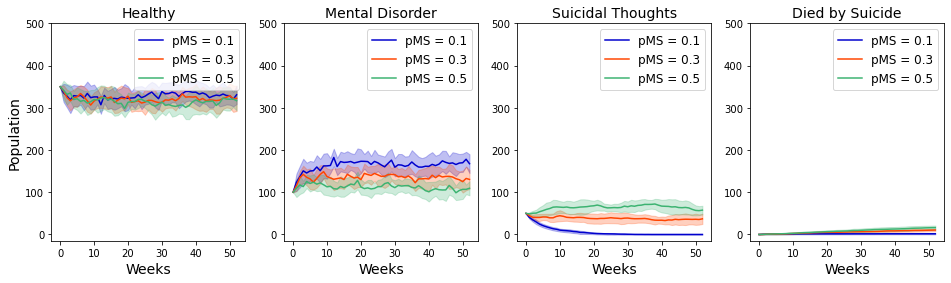

In [616]:
## plot! 

# with error bars
fig, ax = plt.subplots(1, 4, figsize = (16, 4))
a_val = 0.25

## nc = 20
ax[0].plot(t20, H20, color='mediumblue', label = 'pMS = 0.1')
ax[0].fill_between(t20, (H20 + H20_v), (H20 -  H20_v), color='mediumblue', alpha=a_val)
ax[0].set_ylim([-15, n])
ax[0].set_ylabel('Population', size = 14)
ax[0].set_title('Healthy', size = 14)

ax[1].plot(t20, M20, color='mediumblue', label = 'pMS = 0.1')
ax[1].fill_between(t20, (M20 + M20_v), (M20 - M20_v), color='mediumblue', alpha=a_val)
ax[1].set_ylim([-15, n])
ax[1].set_title('Mental Disorder', size = 14)

ax[2].plot(t20, S20, color='mediumblue', label = 'pMS = 0.1')
ax[2].fill_between(t20, (S20 + S20_v), (S20 - S20_v), color='mediumblue', alpha=a_val)
ax[2].set_ylim([-15, n])
ax[2].set_title('Suicidal Thoughts', size = 14)

ax[3].plot(t20, D20, color='mediumblue', label = 'pMS = 0.1')
ax[3].fill_between(t20, (D20 + D20_v), (D20 - D20_v), color='mediumblue', alpha=a_val)
ax[3].set_ylim([-15, n])
ax[3].set_title('Died by Suicide', size = 14)

## nc = 40
ax[0].plot(t40, H40, color='orangered', label = 'pMS = 0.3')
ax[0].fill_between(t40, (H40 + H40_v), (H40 -  H40_v), color='orangered', alpha=a_val)

ax[1].plot(t40, M40, color='orangered', label = 'pMS = 0.3')
ax[1].fill_between(t40, (M40 + M40_v), (M40 - M40_v), color='orangered', alpha=a_val)

ax[2].plot(t40, S40, color='orangered', label = 'pMS = 0.3')
ax[2].fill_between(t40, (S40 + S40_v), (S40 - S40_v), color='orangered', alpha=a_val)

ax[3].plot(t40, D40, color='orangered', label = 'pMS = 0.3')
ax[3].fill_between(t40, (D40 + D40_v), (D40 - D40_v), color='orangered', alpha=a_val)

## nc = 60
ax[0].plot(t60, H60, color='mediumseagreen', label = 'pMS = 0.5')
ax[0].fill_between(t60, (H60 + H60_v), (H60 -  H60_v), color='mediumseagreen', alpha=a_val)

ax[1].plot(t60, M60, color='mediumseagreen', label = 'pMS = 0.5')
ax[1].fill_between(t60, (M60 + M60_v), (M60 - M60_v), color='mediumseagreen', alpha=a_val)

ax[2].plot(t60, S60, color='mediumseagreen', label = 'pMS = 0.5')
ax[2].fill_between(t60, (S60 + S60_v), (S60 - S60_v), color='mediumseagreen', alpha=a_val)

ax[3].plot(t60, D60, color='mediumseagreen', label = 'pMS = 0.5')
ax[3].fill_between(t60, (D60 + D60_v), (D60 - D60_v), color='mediumseagreen', alpha=a_val)

for ii in range(4): 
    ax[ii].set_xlabel('Weeks', size = 14)
    #ax[ii].set_ylabel('Population', size = 12)
    ax[ii].legend(fontsize = 12, loc = 'upper right')
    
plt.savefig("images/group_agent_sensitivitypT.png", dpi = 300, bbox_inches='tight');